<a href="https://colab.research.google.com/github/User-Galih/Exercise/blob/main/CapstoneUASBengkod_14396.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone DS05


Nama : Tira Karel Agata <br>
NIM : A11.2022.14396


# 1. EDA

In [1]:
# Import Library
import pandas as pd # untuk melakukan manipulasi, analisis, dan visualisasi data
import numpy as np # NumPy menyediakan berbagai fungsi untuk melakukan operasi numerik
import matplotlib.pyplot as plt # untuk visualisasi data
import seaborn as sns # library yang dibangun di atas Matplotlib
from sklearn.preprocessing import LabelEncoder # Library untuk Label Encoding (mengubah nilai fitur kategorikal menjadi numerik)
import pickle
import os
import time
from sklearn.model_selection import train_test_split # library train split data
from sklearn.model_selection import GridSearchCV #library hyperparameter
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE # libary untuk smore oversampling
from imblearn.over_sampling import SMOTENC
from sklearn.neighbors import KNeighborsClassifier # knn
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.tree import DecisionTreeClassifier # decision tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score # evaluasi model

In [2]:
# prompt: connect to drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Membaca dataset pada gdrive
# df = pd.read_csv('/content/drive/MyDrive/Bengkel Koding/ObesityDataSet.csv')

# Galih
df = pd.read_csv('/content/drive/MyDrive/Semester 6/BengKod/ObesityDataSet.csv')

In [4]:
df.head(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# Merubah nama kolom
df.rename(columns={
    'Gender': 'Gender',
    'Age'   : 'Age',
    'Height': 'Height',
    'Weight': 'Weight',
    'family_history_with_overweight': 'FamilyHistoryOverweight',
    'FAVC'  : 'HighCalorieFood',
    'FCVC'  : 'VegetableConsumption',
    'NCP'   : 'MealFrequency',
    'CAEC'  : 'SnackConsumption',
    'SMOKE' : 'Smoking',
    'CH2O'  : 'WaterIntake',
    'SCC'   : 'CalorieMonitoring',
    'FAF'   : 'PhysicalActivity',
    'TUE'   : 'TechnologyUse',
    'CALC'  : 'AlcoholConsumption',
    'MTRANS': 'Transportation',
    'NObeyesdad': 'ObesityLevel'
}, inplace=True)

In [6]:
# Menampilkan 5 data dengan nama kolom baru
df.head(5)

,Age,Gender,Height,Weight,AlcoholConsumption,HighCalorieFood,VegetableConsumption,MealFrequency,CalorieMonitoring,Smoking,WaterIntake,FamilyHistoryOverweight,PhysicalActivity,TechnologyUse,SnackConsumption,Transportation,ObesityLevel
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
# Menampilkan Informasi umum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      2097 non-null   object
 1   Gender                   2102 non-null   object
 2   Height                   2099 non-null   object
 3   Weight                   2100 non-null   object
 4   AlcoholConsumption       2106 non-null   object
 5   HighCalorieFood          2100 non-null   object
 6   VegetableConsumption     2103 non-null   object
 7   MealFrequency            2099 non-null   object
 8   CalorieMonitoring        2101 non-null   object
 9   Smoking                  2106 non-null   object
 10  WaterIntake              2105 non-null   object
 11  FamilyHistoryOverweight  2098 non-null   object
 12  PhysicalActivity         2103 non-null   object
 13  TechnologyUse            2102 non-null   object
 14  SnackConsumption         2100 non-null  

Tipe data masih berupa object

In [8]:
# Deskripsi statistik data numerik
df.describe()

,Age,Gender,Height,Weight,AlcoholConsumption,HighCalorieFood,VegetableConsumption,MealFrequency,CalorieMonitoring,Smoking,WaterIntake,FamilyHistoryOverweight,PhysicalActivity,TechnologyUse,SnackConsumption,Transportation,ObesityLevel
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


Masih terdapat missing value <br>
Nilai unique gender yang tidak sesuai (3)

In [9]:
# Cek missing values
df.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
AlcoholConsumption,5
HighCalorieFood,11
VegetableConsumption,8
MealFrequency,12
CalorieMonitoring,10
Smoking,5


In [10]:
# Cek unique value
df.nunique()

,0
Age,1394
Gender,3
Height,1562
Weight,1518
AlcoholConsumption,5
HighCalorieFood,3
VegetableConsumption,808
MealFrequency,637
CalorieMonitoring,3
Smoking,3


In [11]:
# Cek data duplikat
df.duplicated().sum()

np.int64(18)

In [12]:
# Melihat jumlah nilai unik dan daftar nilai unik pada setiap kolom
for col in df.columns:
    print(f"\nKolom: {col}")
    print(f"Jumlah nilai unik: {df[col].nunique()}")
    print(f"Nilai unik: {df[col].unique()}")


Kolom: Age
Jumlah nilai unik: 1394
Nilai unik: ['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Kolom: Gender
Jumlah nilai unik: 3
Nilai unik: ['Female' 'Male' '?' nan]

Kolom: Height
Jumlah nilai unik: 1562
Nilai unik: ['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Kolom: Weight
Jumlah nilai unik: 1518
Nilai unik: ['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

Kolom: AlcoholConsumption
Jumlah nilai unik: 5
Nilai unik: ['no' 'Sometimes' 'Frequently' '?' 'Always' nan]

Kolom: HighCalorieFood
Jumlah nilai unik: 3
Nilai unik: ['no' 'yes' '?' nan]

Kolom: VegetableConsumption
Jumlah nilai unik: 808
Nilai unik: ['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2.714447' '2.750715' '1.4925' '2.205439'
 '2.059138' '2.310423' '2.823179' '2.052932' '2.596364' '2.767731'
 '2.815157' '2.737762' '2.524428' '2.971574' '1.0816' '1.270448'
 '1.34

In [13]:
# Mengecek dan ubah missing values menjadi nan
df.replace('?', np.nan, inplace=True)

In [14]:
# Replace 'no' jadi 'No' pada kolom SnackConsumption dan AlcoholConsumption
df['SnackConsumption'] = df['SnackConsumption'].replace('no', 'No')
df['AlcoholConsumption'] = df['AlcoholConsumption'].replace('no', 'No')

In [15]:
# Melihat jumlah nilai unik dan daftar nilai unik pada setiap kolom
for col in df.columns:
    print(f"\nKolom: {col}")
    print(f"Jumlah nilai unik: {df[col].nunique()}")
    print(f"Nilai unik: {df[col].unique()}")


Kolom: Age
Jumlah nilai unik: 1393
Nilai unik: ['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Kolom: Gender
Jumlah nilai unik: 2
Nilai unik: ['Female' 'Male' nan]

Kolom: Height
Jumlah nilai unik: 1561
Nilai unik: ['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Kolom: Weight
Jumlah nilai unik: 1517
Nilai unik: ['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

Kolom: AlcoholConsumption
Jumlah nilai unik: 4
Nilai unik: ['No' 'Sometimes' 'Frequently' nan 'Always']

Kolom: HighCalorieFood
Jumlah nilai unik: 2
Nilai unik: ['no' 'yes' nan]

Kolom: VegetableConsumption
Jumlah nilai unik: 807
Nilai unik: ['2' '3' '1' nan '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2.714447' '2.750715' '1.4925' '2.205439'
 '2.059138' '2.310423' '2.823179' '2.052932' '2.596364' '2.767731'
 '2.815157' '2.737762' '2.524428' '2.971574' '1.0816' '1.270448'
 '1.344854' '2.959658'

? sudah diubah ke nan

In [16]:
numeric_cols = ['Age', 'Height', 'Weight', 'VegetableConsumption', 'MealFrequency',
                'WaterIntake', 'PhysicalActivity', 'TechnologyUse']

In [17]:
# cetak value counts tiap kolom
for col in numeric_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())


Kolom: Age
Age
18           124
26            99
21            96
23            89
19            59
            ... 
31.426573      1
34.369686      1
33.690239      1
37.496175      1
18.701766      1
Name: count, Length: 1393, dtype: int64

Kolom: Height
Height
1.7         58
1.65        50
1.6         41
1.75        39
1.62        36
            ..
1.699474     1
1.621048     1
1.560029     1
1.835678     1
1.701397     1
Name: count, Length: 1561, dtype: int64

Kolom: Weight
Weight
80           58
50           42
70           41
75           39
60           36
             ..
97.92035      1
88.431954     1
86.963628     1
84.315608     1
89.802492     1
Name: count, Length: 1517, dtype: int64

Kolom: VegetableConsumption
VegetableConsumption
3           647
2           592
1            33
2.442536      2
2.823179      2
           ... 
2.010684      1
2.300408      1
2.119643      1
2.901924      1
2.749629      1
Name: count, Length: 807, dtype: int64

Kolom: MealFrequency
MealF

In [18]:
# Fitur kategorikal dan biner
categorical_cols = ['Gender', 'FamilyHistoryOverweight', 'HighCalorieFood', 'SnackConsumption',
                    'Smoking', 'CalorieMonitoring', 'AlcoholConsumption',
                    'Transportation', 'ObesityLevel']

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [19]:
# Fitur integer
integer_cols = ['VegetableConsumption', 'TechnologyUse', 'MealFrequency', 'WaterIntake', 'PhysicalActivity']

for col in integer_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').round().astype('Int64')

# Fitur kontinu
continuous_cols = ['Age', 'Height', 'Weight']

# Age → round ke integer
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').round().astype('Int64')

# Height → 2 desimal
df['Height'] = pd.to_numeric(df['Height'], errors='coerce').round(2)

# Weight → 1 desimal
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce').round(1)


In [20]:
# Menampilkan Informasi umum dari dataset (cek tipe data setelah diganti)
df.info()

# Deskripsi statistik data numerik (setelah perubahan)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      2089 non-null   Int64   
 1   Gender                   2089 non-null   category
 2   Height                   2089 non-null   float64 
 3   Weight                   2092 non-null   float64 
 4   AlcoholConsumption       2091 non-null   category
 5   HighCalorieFood          2089 non-null   category
 6   VegetableConsumption     2093 non-null   Int64   
 7   MealFrequency            2089 non-null   Int64   
 8   CalorieMonitoring        2093 non-null   category
 9   Smoking                  2098 non-null   category
 10  WaterIntake              2096 non-null   Int64   
 11  FamilyHistoryOverweight  2088 non-null   category
 12  PhysicalActivity         2092 non-null   Int64   
 13  TechnologyUse            2096 non-null   Int64   
 14  SnackCon

,Age,Height,Weight,VegetableConsumption,MealFrequency,WaterIntake,PhysicalActivity,TechnologyUse
count,2089.0,2089.000000,2092.000000,2093.0,2089.0,2096.0,2092.0,2096.0
mean,24.72044,1.706573,88.608174,2.449116,2.732408,2.036737,1.071224,0.686546
std,8.399528,0.117753,36.154784,0.685074,1.003207,0.800409,1.187047,0.775847
min,14.0,1.450000,39.000000,1.0,1.0,1.0,0.0,0.0
25%,20.0,1.630000,66.000000,2.0,3.0,2.0,0.0,0.0
50%,23.0,1.700000,83.000000,2.0,3.0,2.0,1.0,1.0
75%,26.0,1.770000,108.025000,3.0,3.0,2.0,2.0,1.0
max,106.0,2.850000,441.100000,9.0,12.0,9.0,12.0,8.0


In [21]:
# List semua kolom numeric yang mau dicek setelah dibulatkan
numeric_cols = ['Age', 'Height', 'Weight', 'VegetableConsumption', 'MealFrequency',
                'WaterIntake', 'PhysicalActivity', 'TechnologyUse']

# Looping untuk cetak value_counts() tiap kolom
for col in numeric_cols:
    print(f"\nKolom: {col}")
    print(f"Jumlah nilai unik: {df[col].nunique()}")
    print(df[col].value_counts())


Kolom: Age
Jumlah nilai unik: 52
Age
21     235
23     214
26     208
18     207
19     169
22     160
20     148
24      95
25      81
17      69
31      60
30      51
27      41
33      35
38      34
29      31
34      29
32      25
37      24
39      24
28      20
41      20
35      19
16      19
40      19
36       6
42       6
44       6
55       5
45       3
43       3
46       2
51       2
88       1
52       1
61       1
56       1
94       1
15       1
14       1
89       1
97       1
99       1
103      1
105      1
48       1
47       1
106      1
91       1
92       1
96       1
101      1
Name: count, dtype: Int64

Kolom: Height
Jumlah nilai unik: 61
Height
1.70    122
1.75    120
1.62     94
1.76     93
1.65     87
       ... 
2.70      1
1.95      1
1.94      1
2.63      1
2.85      1
Name: count, Length: 61, dtype: int64

Kolom: Weight
Jumlah nilai unik: 697
Weight
80.0     62
50.0     44
70.0     42
75.0     40
60.0     37
         ..
41.4      1
49.5      1
81.4     

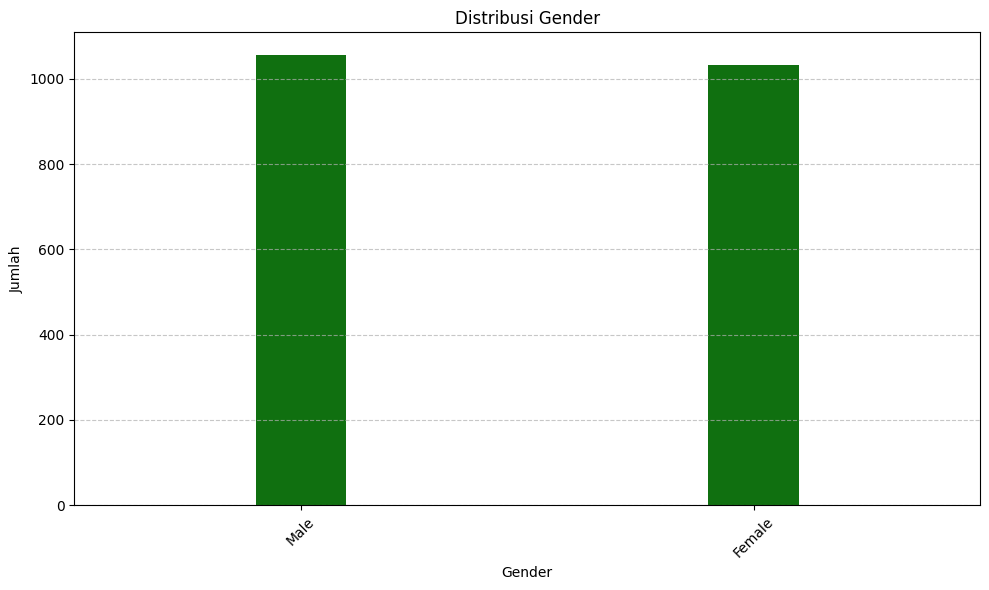

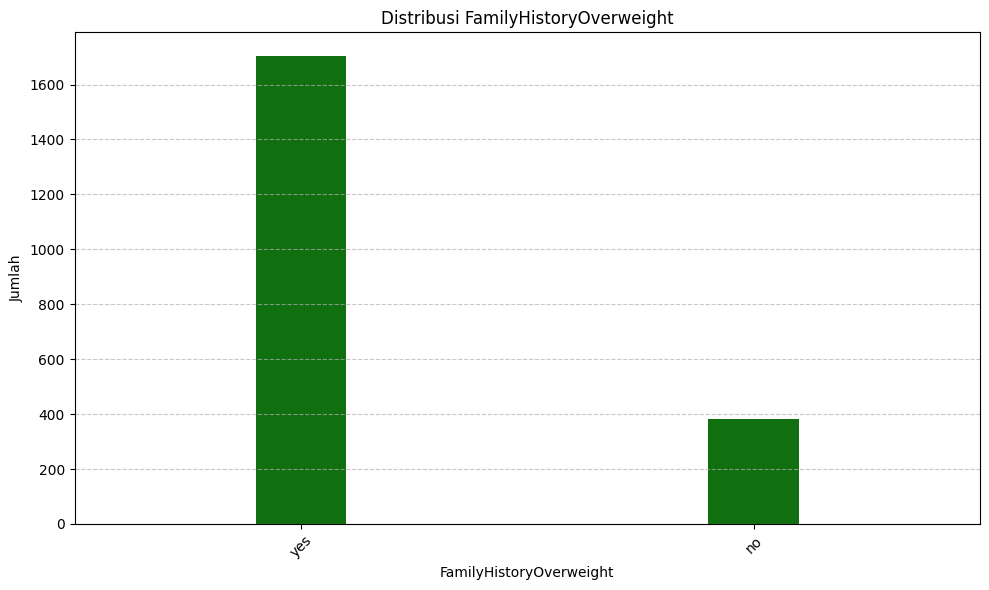

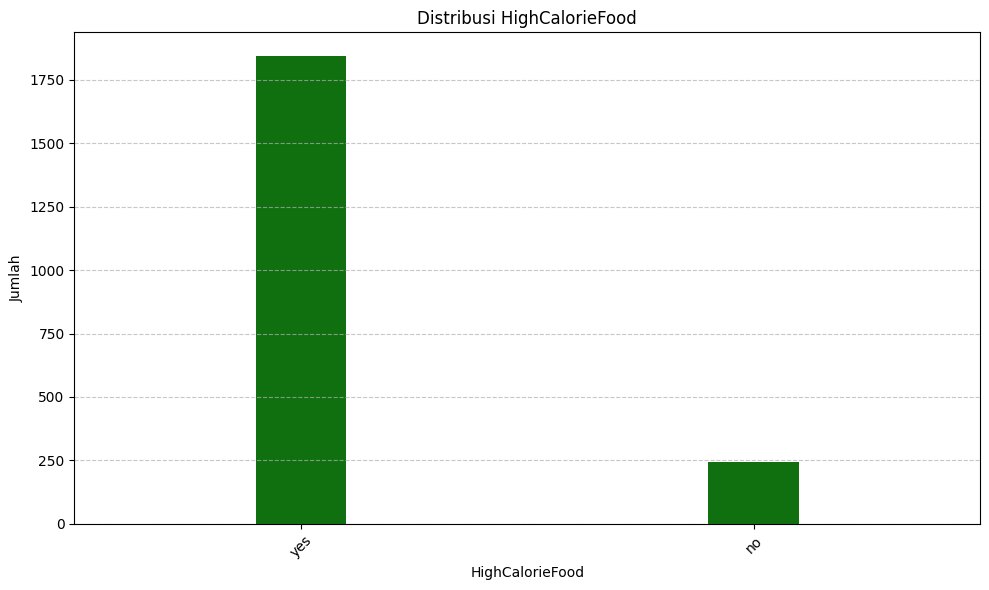

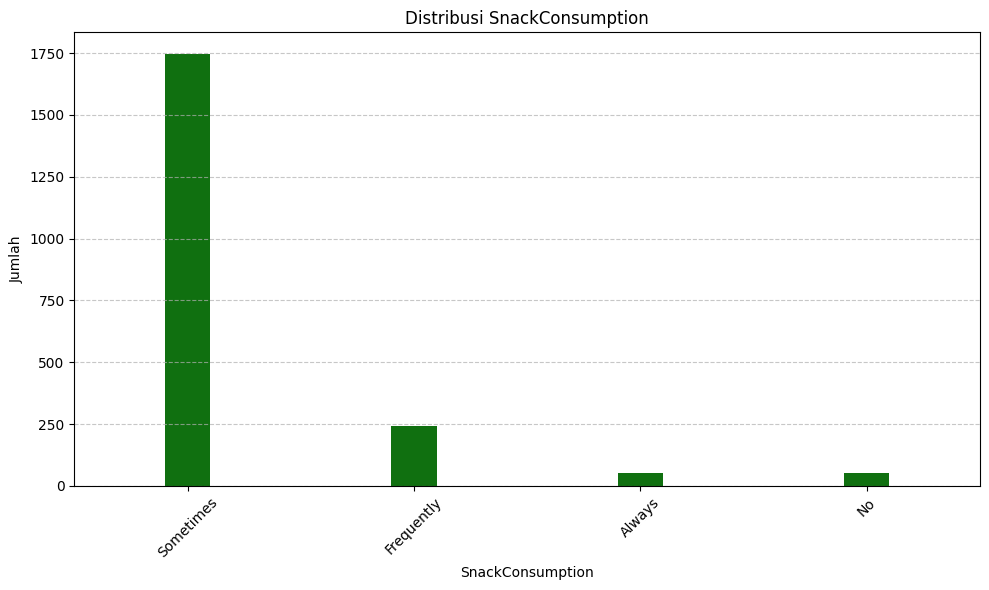

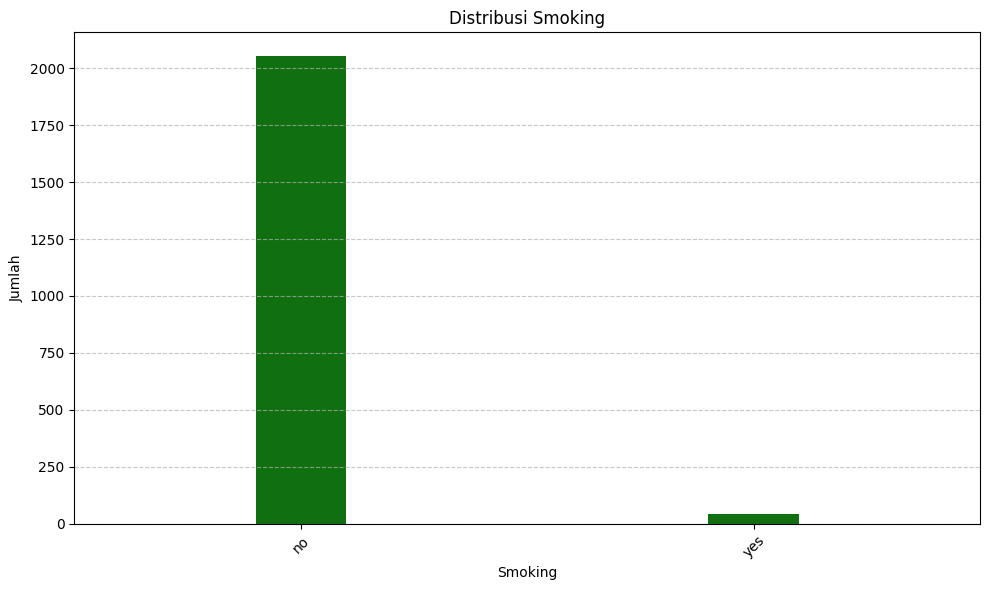

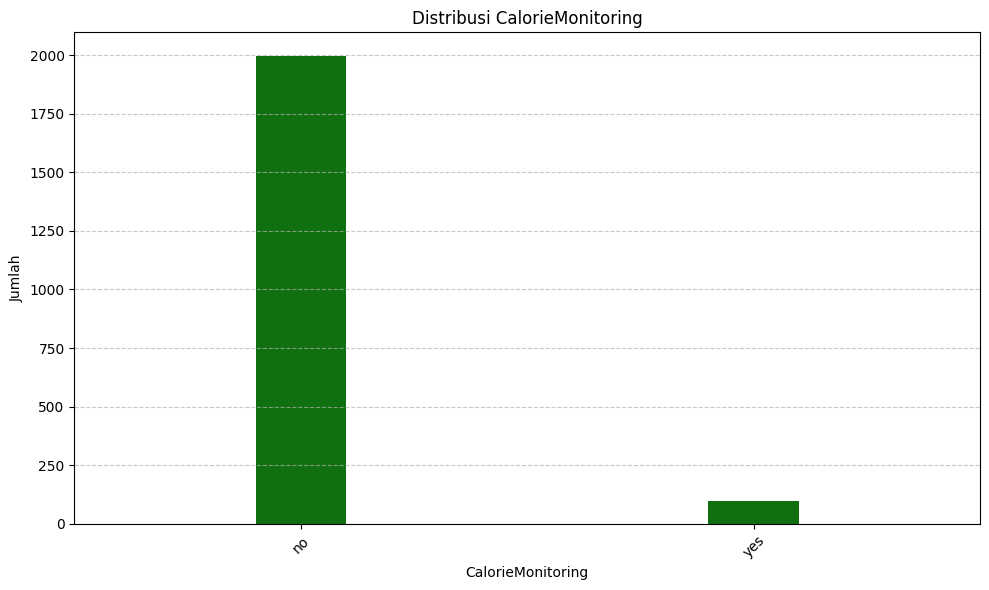

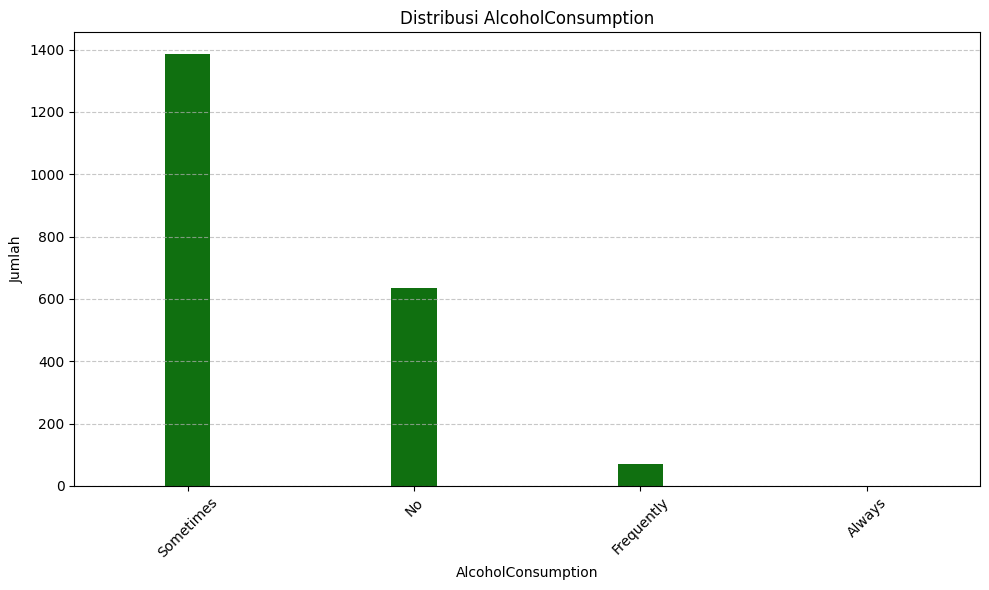

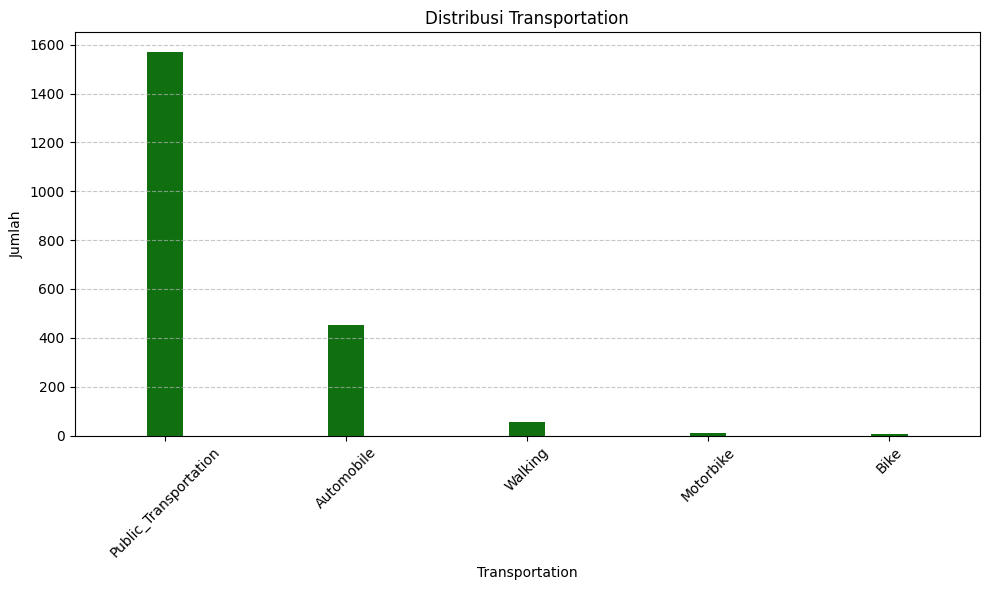

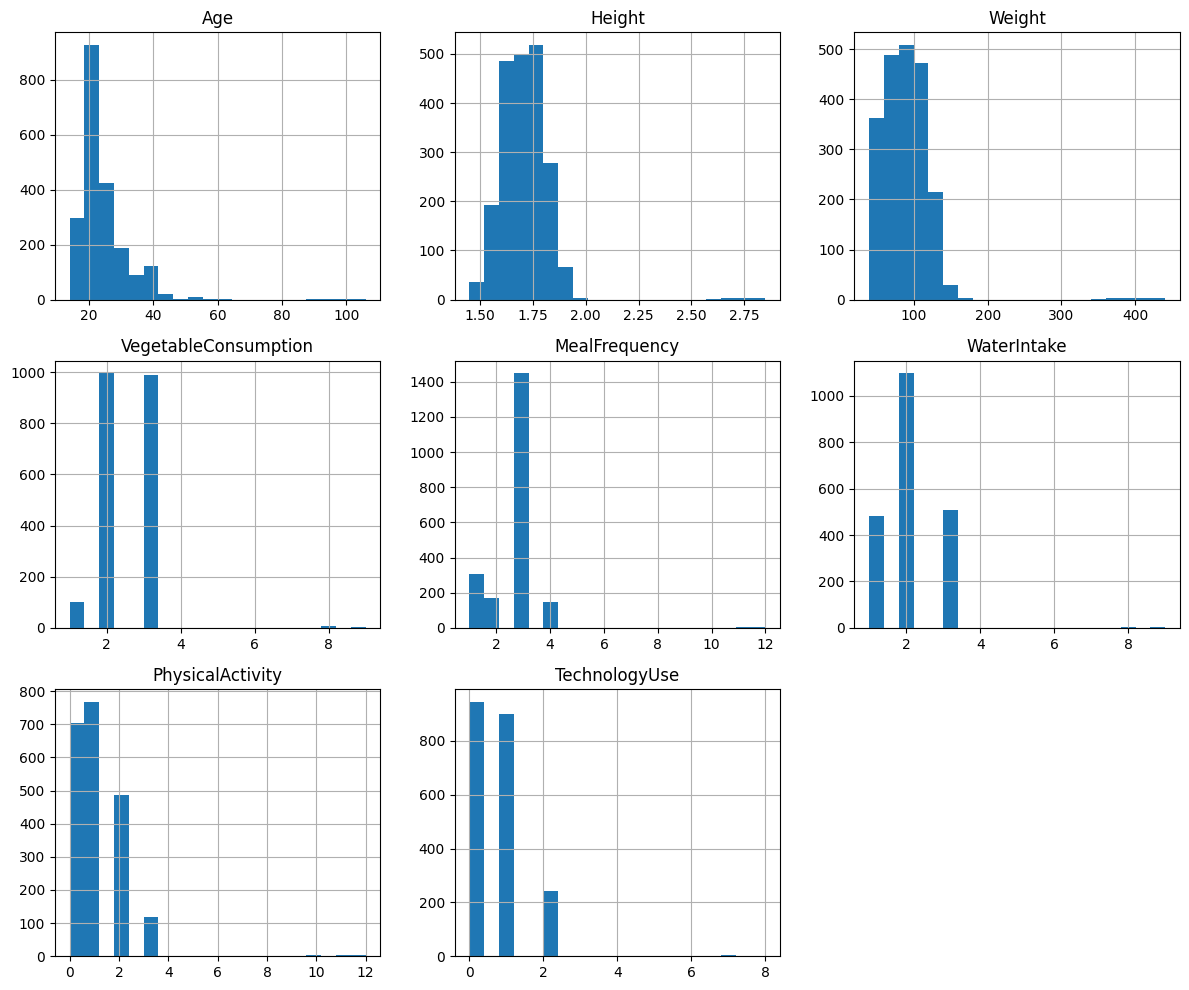

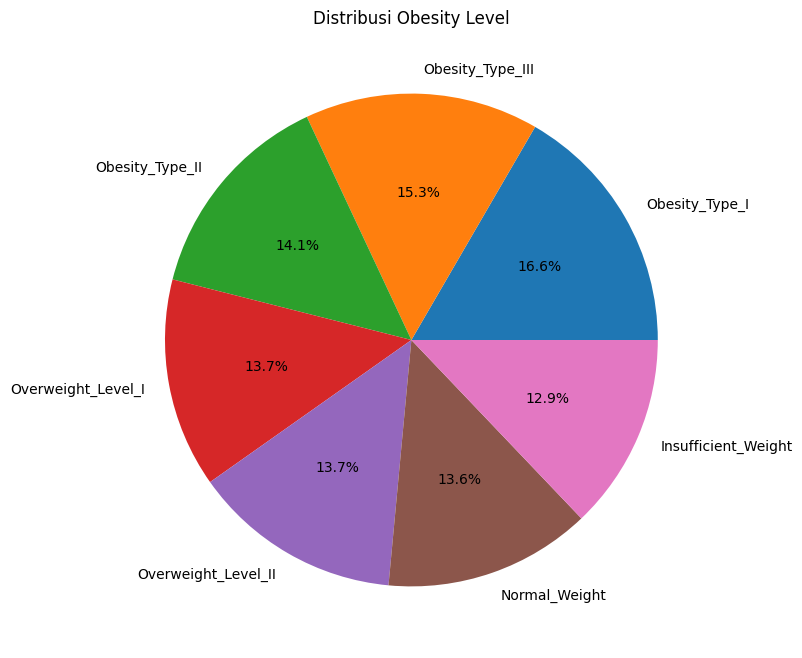

<ipython-input-22-2844612048>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


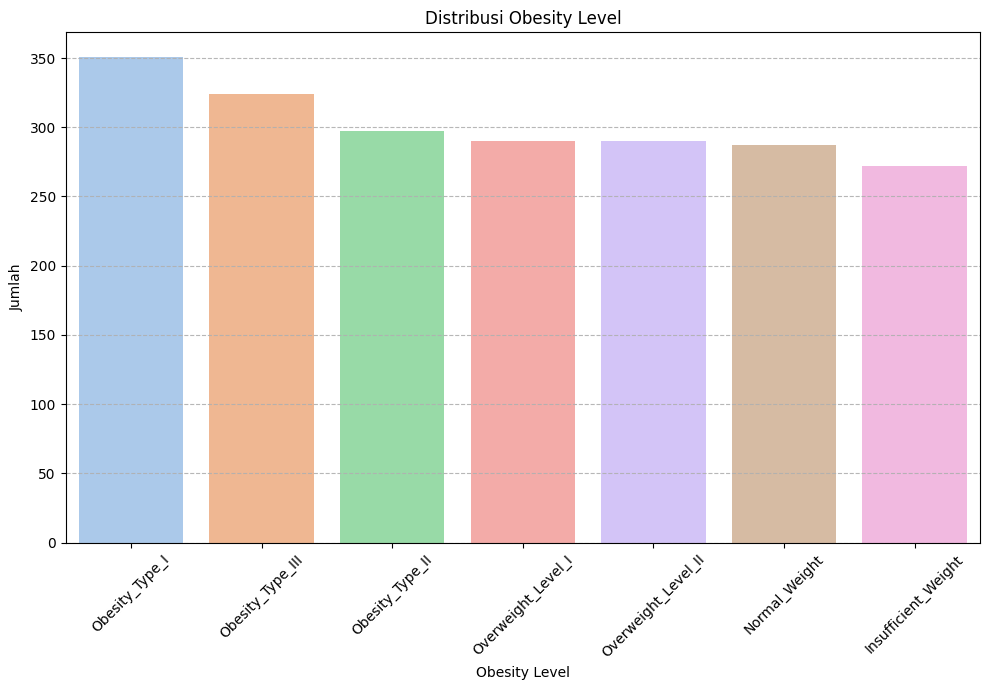

In [22]:
# Daftar fitur kategori
categorical_cols = [
    'Gender', 'FamilyHistoryOverweight', 'HighCalorieFood', 'SnackConsumption',
    'Smoking', 'CalorieMonitoring', 'AlcoholConsumption', 'Transportation'
]

# Plot bar untuk setiap fitur kategori
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, color='green', width=0.2)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Histogram untuk numeric feature
df.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

# Pie chart distribusi target
df['ObesityLevel'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribusi Obesity Level')
plt.ylabel('')
plt.show()

# Bar chart distribusi target
plt.figure(figsize=(10, 7))
sns.countplot(
    x='ObesityLevel',
    data=df,
    palette='pastel',  # gunakan palette agar tiap kategori beda warna
    order=df['ObesityLevel'].value_counts().index
)
plt.title('Distribusi Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

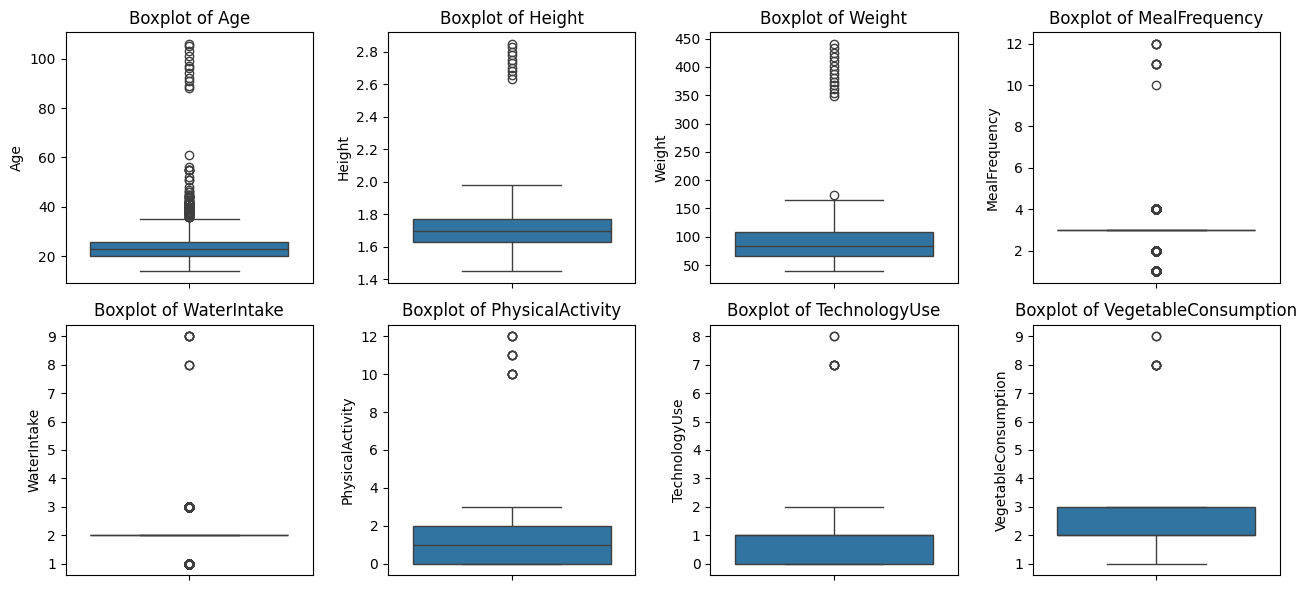

In [23]:
# Boxplot untuk numeric feature
numeric_columns = ['Age', 'Height', 'Weight', 'MealFrequency', 'WaterIntake', 'PhysicalActivity', 'TechnologyUse', 'VegetableConsumption']

plt.figure(figsize=(13, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Kesimpulan EDA

- Data type awal bertipe object semua
- Ditemukan record duplikat (18) data
- Distribusi fitur kategorikal masih memiliki values yang inkonsisten, harus dilakukan penyesuaian unique value agar konsisten

# 2. Preprocessing

In [24]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True)

In [25]:
# Tangani missing value numerik dengan mean
numerical_cols = ['Age', 'Height', 'Weight', 'VegetableConsumption', 'MealFrequency',
                  'WaterIntake', 'PhysicalActivity', 'TechnologyUse']

for col in numerical_cols:
    # Menghitung rata-rata
    mean_value = df[col].mean()
    # convert rata-rata (jika float) maka akan di-integer-kan
    if col in ['Age', 'VegetableConsumption', 'MealFrequency', 'WaterIntake', 'PhysicalActivity', 'TechnologyUse']:
        fill_value = int(round(mean_value)) # Pembulatan ke nilai integer
    else:
        fill_value = mean_value # Use the float mean for float columns (Height, Weight)

    # Mengatasi FutureWarning: Tetapkan kembali hasil fillna ke kolom
    df[col] = df[col].fillna(fill_value)

In [26]:
# Tangani missing value kategorikal dengan modus
categorical_cols = ['Gender', 'AlcoholConsumption', 'HighCalorieFood', 'CalorieMonitoring',
                    'Smoking', 'FamilyHistoryOverweight', 'SnackConsumption',
                    'Transportation', 'ObesityLevel']

for col in categorical_cols:
    # Ambil nilai modus (mode)
    mode_value = df[col].mode()[0]
    # Mengatasi FutureWarning: Tetapkan kembali hasil fillna ke kolom
    df[col] = df[col].fillna(mode_value)

In [27]:
# Cek missing value
print(df.isnull().sum())

Age                        0
Gender                     0
Height                     0
Weight                     0
AlcoholConsumption         0
HighCalorieFood            0
VegetableConsumption       0
MealFrequency              0
CalorieMonitoring          0
Smoking                    0
WaterIntake                0
FamilyHistoryOverweight    0
PhysicalActivity           0
TechnologyUse              0
SnackConsumption           0
Transportation             0
ObesityLevel               0
dtype: int64


missing value sudah tidak ada

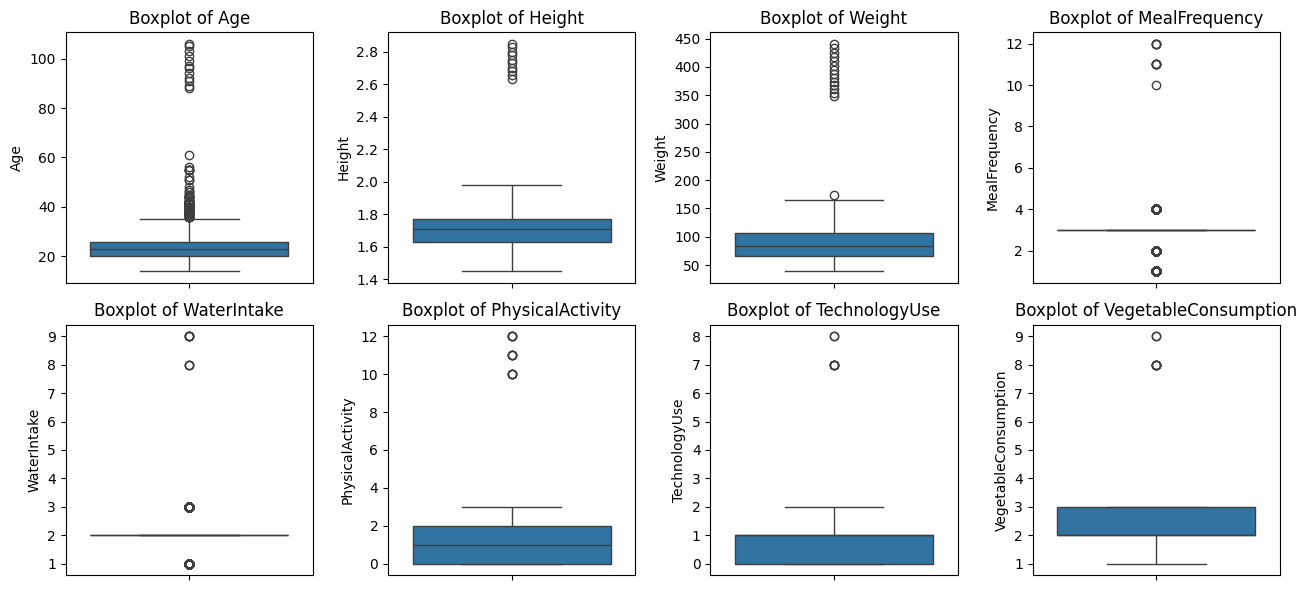

In [28]:
# Boxplot untuk check nilai outlier pada fitur numerik
numeric_columns = ['Age', 'Height', 'Weight', 'MealFrequency', 'WaterIntake', 'PhysicalActivity', 'TechnologyUse', 'VegetableConsumption']

plt.figure(figsize=(13, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [29]:
# Penanganan outlier menggunakan modus
# Daftar kolom numerik
numeric_columns = ['Age', 'Height', 'Weight', 'PhysicalActivity', 'TechnologyUse', 'VegetableConsumption']

# Cek jumlah outlier sebelum ditangani (untuk kolom selain MealFrequency & WaterIntake)
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f'Jumlah outlier di kolom {col} sebelum ditangani: {outliers_count}')

Jumlah outlier di kolom Age sebelum ditangani: 171
Jumlah outlier di kolom Height sebelum ditangani: 10
Jumlah outlier di kolom Weight sebelum ditangani: 15
Jumlah outlier di kolom PhysicalActivity sebelum ditangani: 12
Jumlah outlier di kolom TechnologyUse sebelum ditangani: 7
Jumlah outlier di kolom VegetableConsumption sebelum ditangani: 8


In [30]:
# Daftar kolom numerik
numeric_columns = ['Age', 'Height', 'Weight', 'PhysicalActivity', 'TechnologyUse', 'VegetableConsumption']

# Tangani outlier dengan modus untuk kolom numerik
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mode_value = df[col].mode()[0]

    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = mode_value

In [31]:
# Daftar kolom numerik
numeric_columns = ['Age', 'Height', 'Weight', 'PhysicalActivity', 'TechnologyUse', 'VegetableConsumption']

# Cek lagi jumlah outlier setelah ditangani (untuk kolom numeric di atas)
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f'Jumlah outlier di kolom {col} setelah ditangani: {outliers_count}')

Jumlah outlier di kolom Age setelah ditangani: 80
Jumlah outlier di kolom Height setelah ditangani: 0
Jumlah outlier di kolom Weight setelah ditangani: 0
Jumlah outlier di kolom PhysicalActivity setelah ditangani: 0
Jumlah outlier di kolom TechnologyUse setelah ditangani: 0
Jumlah outlier di kolom VegetableConsumption setelah ditangani: 0


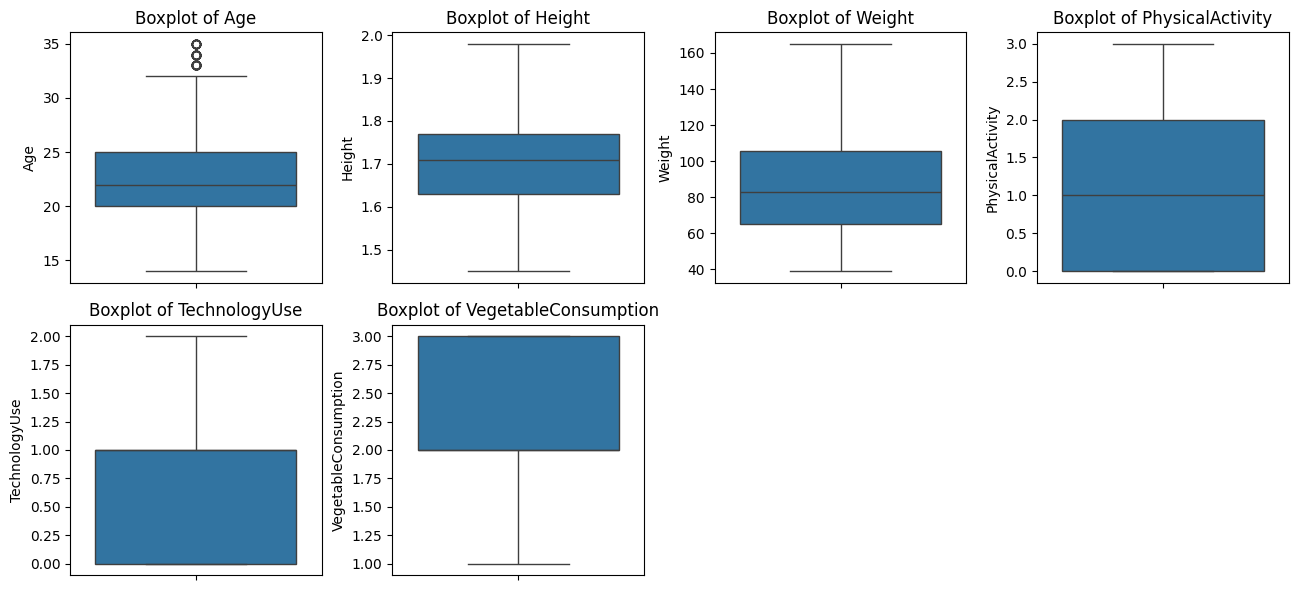

In [32]:
# Boxplot untuk check nilai outlier pada fitur numerik
numeric_columns = ['Age', 'Height', 'Weight', 'PhysicalActivity', 'TechnologyUse', 'VegetableConsumption']

plt.figure(figsize=(13, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [33]:
# Tangani outlier khusus untuk MealFrequency: keep 1-4, selain itu ganti modus
meal_mode = df['MealFrequency'].mode()[0]
df.loc[~df['MealFrequency'].isin([1, 2, 3, 4]), 'MealFrequency'] = meal_mode

# Tangani outlier khusus untuk WaterIntake: keep 1-3, selain itu ganti modus
water_mode = df['WaterIntake'].mode()[0]
df.loc[~df['WaterIntake'].isin([1, 2, 3]), 'WaterIntake'] = water_mode

In [34]:
# List jumlah nilai unik semua kolom numeric
numeric_cols = ['Age', 'Height', 'Weight', 'VegetableConsumption', 'MealFrequency',
                'WaterIntake', 'PhysicalActivity', 'TechnologyUse']

# Looping untuk cetak value_counts() tiap kolom
for col in numeric_cols:
    print(f"\nKolom: {col}")
    print(f"Jumlah nilai unik: {df[col].nunique()}")
    print(df[col].value_counts())


Kolom: Age
Jumlah nilai unik: 22
Age
21    382
23    210
18    203
26    171
19    168
22    158
20    147
25    101
24     95
17     68
31     60
30     50
27     41
33     34
29     29
34     28
32     25
28     20
16     18
35     18
15      1
14      1
Name: count, dtype: Int64

Kolom: Height
Jumlah nilai unik: 52
Height
1.700000    129
1.750000    117
1.760000     91
1.650000     83
1.600000     74
1.720000     72
1.620000     72
1.770000     69
1.710000     67
1.630000     66
1.780000     64
1.790000     64
1.670000     64
1.740000     64
1.680000     58
1.610000     58
1.800000     57
1.660000     55
1.690000     53
1.640000     51
1.820000     49
1.730000     42
1.810000     39
1.560000     39
1.840000     38
1.850000     37
1.830000     33
1.550000     32
1.570000     30
1.590000     29
1.580000     26
1.530000     24
1.708789     22
1.870000     22
1.860000     21
1.540000     20
1.500000     17
1.520000     15
1.910000     11
1.880000     10
1.510000     10
1.900000      7


Ubah data kategori menjadi numerik

In [35]:
# List kolom kategorikal
categorical_cols = ['Gender', 'AlcoholConsumption', 'HighCalorieFood', 'CalorieMonitoring',
                    'Smoking', 'FamilyHistoryOverweight', 'SnackConsumption',
                    'Transportation', 'ObesityLevel']

# Melihat jumlah nilai unik dan daftar nilai unik pada setiap kolom
for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(f"Jumlah nilai unik: {df[col].nunique()}")
    print(f"Nilai unik: {df[col].unique()}")


Kolom: Gender
Jumlah nilai unik: 2
Nilai unik: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']

Kolom: AlcoholConsumption
Jumlah nilai unik: 4
Nilai unik: ['No', 'Sometimes', 'Frequently', 'Always']
Categories (4, object): ['Always', 'Frequently', 'No', 'Sometimes']

Kolom: HighCalorieFood
Jumlah nilai unik: 2
Nilai unik: ['no', 'yes']
Categories (2, object): ['no', 'yes']

Kolom: CalorieMonitoring
Jumlah nilai unik: 2
Nilai unik: ['no', 'yes']
Categories (2, object): ['no', 'yes']

Kolom: Smoking
Jumlah nilai unik: 2
Nilai unik: ['no', 'yes']
Categories (2, object): ['no', 'yes']

Kolom: FamilyHistoryOverweight
Jumlah nilai unik: 2
Nilai unik: ['yes', 'no']
Categories (2, object): ['no', 'yes']

Kolom: SnackConsumption
Jumlah nilai unik: 4
Nilai unik: ['Sometimes', 'Frequently', 'Always', 'No']
Categories (4, object): ['Always', 'Frequently', 'No', 'Sometimes']

Kolom: Transportation
Jumlah nilai unik: 5
Nilai unik: ['Public_Transportation', 'Walking', 'Automobile', 'Mo

In [36]:
# List kolom kategorikal
categorical_cols = ['Gender', 'AlcoholConsumption', 'HighCalorieFood', 'CalorieMonitoring',
                    'Smoking', 'FamilyHistoryOverweight', 'SnackConsumption',
                    'Transportation', 'ObesityLevel']

# Custom ordinal mapping
ordinal_mappings = {
    'AlcoholConsumption': {'No': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'SnackConsumption': {'No': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
}

# Folder penyimpanan encoder di Google Drive
encoder_dir = '/content/drive/MyDrive/Bengkel Koding/Encoder'
if not os.path.exists(encoder_dir):
    os.makedirs(encoder_dir)

# LabelEncoder dict untuk fitur binary & nominal
encoders = {}

# Proses encoding
for col in categorical_cols:
    if col in ordinal_mappings:
        # Gunakan custom mapping
        df[col] = df[col].map(ordinal_mappings[col])
    else:
        # Gunakan LabelEncoder
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le
        # Simpan LabelEncoder ke file pickle di Google Drive
        with open(f'{encoder_dir}/{col}_encoder.pkl', 'wb') as f:
            pickle.dump(le, f)

# Simpan ordinal mapping ke file pickle di Google Drive
with open(f'{encoder_dir}/ordinal_mappings.pkl', 'wb') as f:
    pickle.dump(ordinal_mappings, f)

print(f"Encoding selesai dan mapping disimpan ke {encoder_dir}")

Encoding selesai dan mapping disimpan ke /content/drive/MyDrive/Bengkel Koding/Encoder


In [37]:
categorical_cols = ['Gender', 'HighCalorieFood', 'CalorieMonitoring',
                    'Smoking', 'FamilyHistoryOverweight', 'Transportation', 'ObesityLevel']

mappings = {}

for col in categorical_cols:
    with open(f'{encoder_dir}/{col}_encoder.pkl', 'rb') as f:
        le = pickle.load(f)
    mappings[col] = {i: cls for i, cls in enumerate(le.classes_)}

# Tampilkan semua mapping
for col, mapping in mappings.items():
    print(f"\nMapping {col}: {mapping}")


Mapping Gender: {0: 'Female', 1: 'Male'}

Mapping HighCalorieFood: {0: 'no', 1: 'yes'}

Mapping CalorieMonitoring: {0: 'no', 1: 'yes'}

Mapping Smoking: {0: 'no', 1: 'yes'}

Mapping FamilyHistoryOverweight: {0: 'no', 1: 'yes'}

Mapping Transportation: {0: 'Automobile', 1: 'Bike', 2: 'Motorbike', 3: 'Public_Transportation', 4: 'Walking'}

Mapping ObesityLevel: {0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}


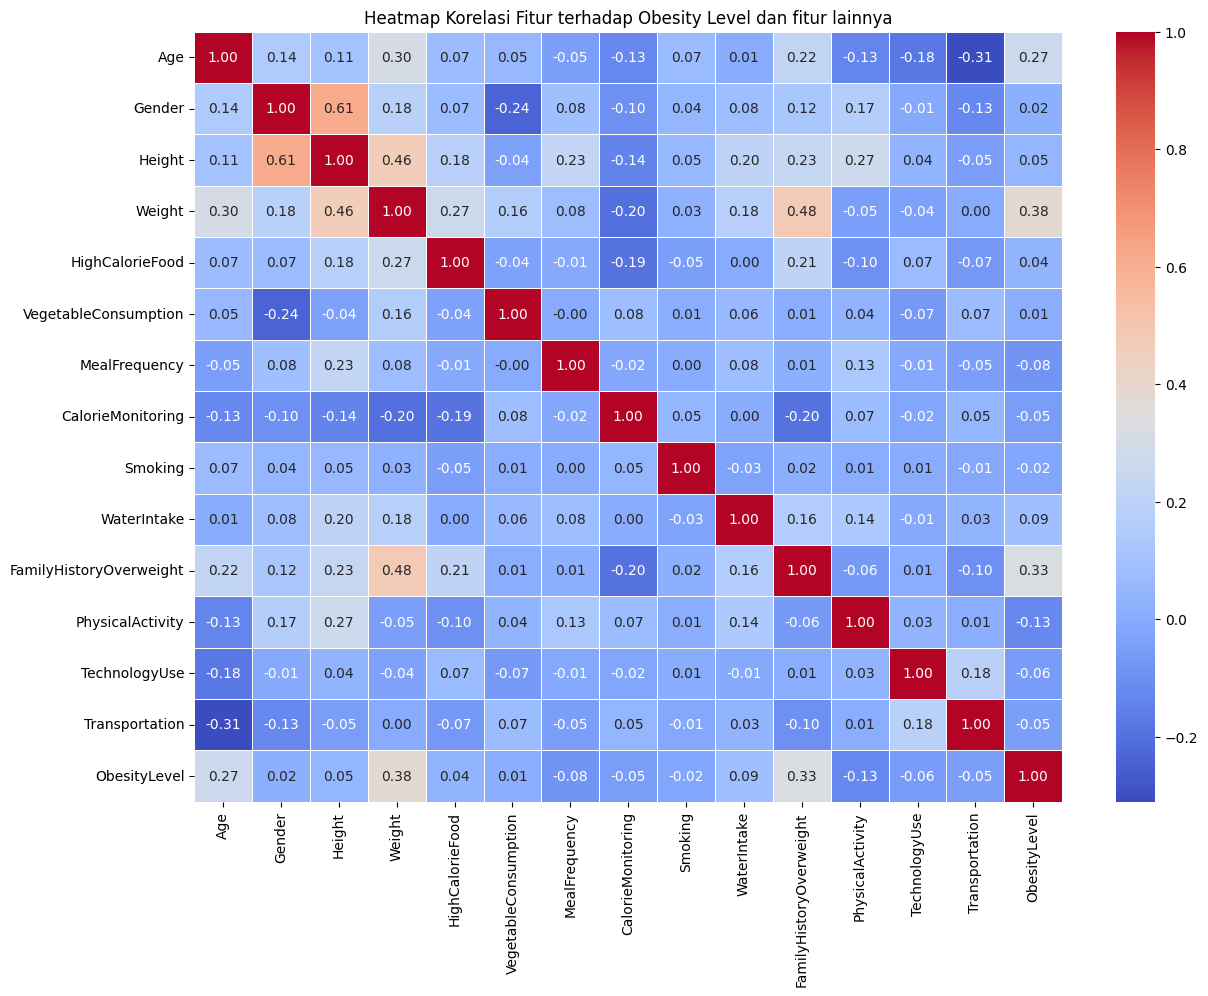

In [38]:
# Hitung matriks korelasi
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap korelasi
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur terhadap Obesity Level dan fitur lainnya")
plt.show()

# Kesimpulan hasil Preprocessing

- Data duplikat sudah terhapus
- penanganan missing value fitur numerik dengan nilai mean (rata-rata)
- Penanganan missing value kategorikal dengan modus
- menampilkan heatmap korelasi fitur terhadap Obesity level dan antar semua fitur / feature selection

# 3. Pemodelan dan Evaluasi

In [39]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['ObesityLevel', 'Smoking'])  # drop Smoking di sini
y = df['ObesityLevel']

In [40]:
# Ensure integer columns have integer dtype before SMOTE
integer_cols_smote = ['VegetableConsumption', 'TechnologyUse', 'MealFrequency', 'WaterIntake', 'PhysicalActivity', 'Age']
for col in integer_cols_smote:
    # Use errors='coerce' to turn any uncastable values into NaN,
    # although missing values should already be handled.
    # Use Int64 to allow for potential NaN if needed, though fillna should have taken care of them.
    X[col] = pd.to_numeric(X[col], errors='coerce').astype('int64')

In [41]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

<ipython-input-42-3405500387>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


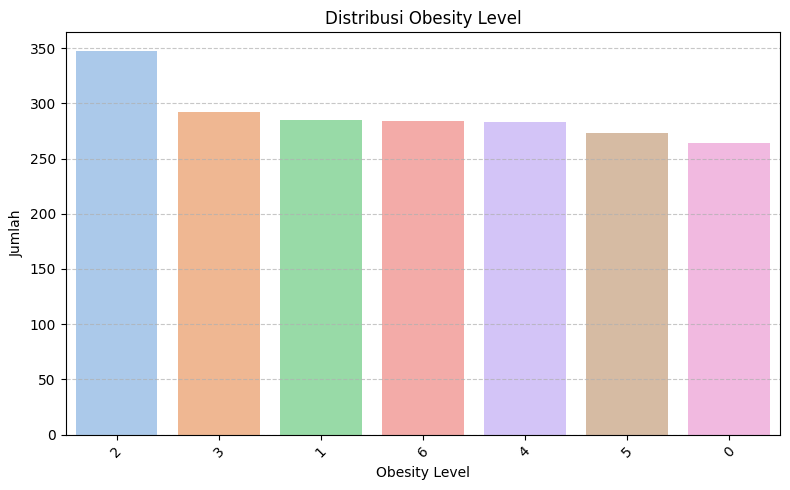

In [42]:
# Bar chart distribusi target
plt.figure(figsize=(8, 5))
sns.countplot(
    x='ObesityLevel',
    data=df,
    palette='pastel',  # gunakan palette agar tiap kategori beda warna
    order=df['ObesityLevel'].value_counts().index
)
plt.title('Distribusi Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
# Menentukan index fitur kategorikal (ordinal mapping)
categorical_features = [
    X_train.columns.get_loc('AlcoholConsumption'),
    X_train.columns.get_loc('SnackConsumption')
]

In [44]:
# SMOTENC di data training
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_train_smote, y_train_smote = smote_nc.fit_resample(X_train, y_train)

Normalisasi Data

In [45]:
# Identifikasi fitur numerik
numeric_columns = [col for col in X_train.columns if col not in ['AlcoholConsumption', 'SnackConsumption']]

In [46]:
# Scaling data
scaler = StandardScaler()

# Jadikan DataFrame dulu
X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Fit ke train smote data
X_train_smote_df[numeric_columns] = scaler.fit_transform(X_train_smote_df[numeric_columns])

# Transform test data
X_test_df[numeric_columns] = scaler.transform(X_test_df[numeric_columns])

Mulai Modelling

In [47]:
# Modeling: 3 algoritma
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [48]:
# Menyimpan hasil evaluasi
results = {}

=== K-Nearest Neighbors ===
              precision    recall  f1-score   support

           0       0.72      0.94      0.82        53
           1       0.65      0.42      0.51        57
           2       0.73      0.78      0.76        69
           3       0.88      0.97      0.92        58
           4       0.98      0.98      0.98        57
           5       0.64      0.53      0.58        55
           6       0.67      0.70      0.68        57

    accuracy                           0.76       406
   macro avg       0.75      0.76      0.75       406
weighted avg       0.75      0.76      0.75       406

Training Time: 0.0078 seconds


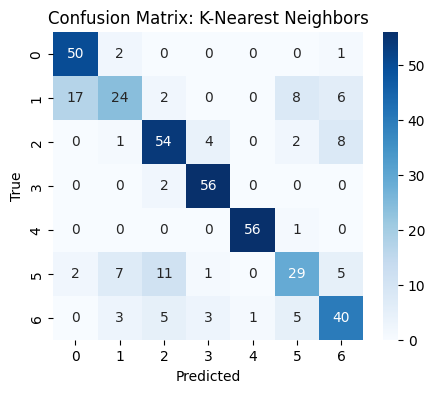

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        53
           1       0.74      0.61      0.67        57
           2       0.88      0.87      0.88        69
           3       0.90      0.98      0.94        58
           4       0.98      0.95      0.96        57
           5       0.71      0.67      0.69        55
           6       0.75      0.77      0.76        57

    accuracy                           0.83       406
   macro avg       0.83      0.83      0.83       406
weighted avg       0.83      0.83      0.83       406

Training Time: 0.0983 seconds


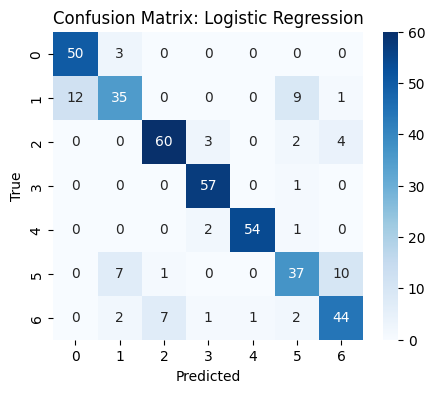

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        53
           1       0.88      0.81      0.84        57
           2       0.93      0.90      0.91        69
           3       0.95      0.98      0.97        58
           4       1.00      0.96      0.98        57
           5       0.81      0.93      0.86        55
           6       0.92      0.86      0.89        57

    accuracy                           0.92       406
   macro avg       0.92      0.92      0.92       406
weighted avg       0.92      0.92      0.92       406

Training Time: 0.0130 seconds


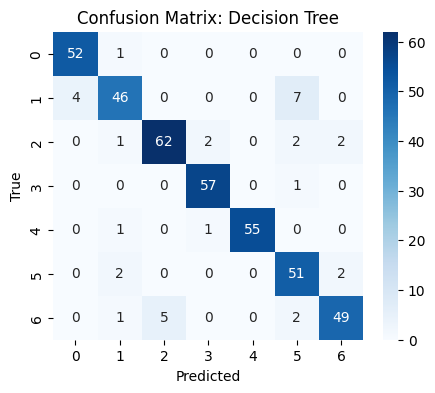

In [49]:
# Training & Evaluasi setiap model
for name, model in models.items():
    print(f"=== {name} ===")

    start_time = time.time()
    # Pakai data hasil SMOTE dan scaling
    model.fit(X_train_smote_df, y_train_smote)
    training_time = time.time() - start_time

    # Prediksi di data test hasil scaling
    y_pred = model.predict(X_test_df)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    # Simpan hasil evaluasi
    results[name] = {
        "accuracy": acc,
        "precision": report['weighted avg']['precision'],
        "recall": report['weighted avg']['recall'],
        "f1-score": report['weighted avg']['f1-score'],
        "training_time": training_time,
        "confusion_matrix": cm,
        "report_text": classification_report(y_test, y_pred)
    }

    # Tampilkan hasil
    print(results[name]["report_text"])
    print(f"Training Time: {training_time:.4f} seconds")

    # Tampilkan confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [50]:
# Buat dataframe hasil evaluasi
summary = pd.DataFrame({
    model: {
        "Accuracy": results[model]["accuracy"],
        "Precision": results[model]["precision"],
        "Recall": results[model]["recall"],
        "F1-Score": results[model]["f1-score"],
        "Training Time (s)": results[model]["training_time"]
    }
    for model in results
}).T

# Tampilkan dalam bentuk tabel
print("\n=== Summary Hasil Evaluasi ===")
print(summary.sort_values(by="Accuracy", ascending=False))


=== Summary Hasil Evaluasi ===
                     Accuracy  Precision    Recall  F1-Score  \
Decision Tree        0.916256   0.918251  0.916256  0.916086   
Logistic Regression  0.830049   0.827966  0.830049  0.827039   
K-Nearest Neighbors  0.761084   0.753509  0.761084  0.750692   

                     Training Time (s)  
Decision Tree                 0.012980  
Logistic Regression           0.098335  
K-Nearest Neighbors           0.007843  


# Kesimpulan hasil Pemodelan

- Decision Tree menunjukkan performa terbaik dibandingkan model lainnya, dengan accuracy 91,63%, precision, recall, dan F1-score yang konsisten di angka sekitar 91%, serta waktu training yang sangat cepat yaitu 0,014 detik
- Logistic Regression menghasilkan nilai accuracy 83,00%, precision dan recall yang cukup stabil di angka 82-83%, namun membutuhkan waktu training yang relatif lebih lama yaitu 0,17 detik
- K-Nearest Neighbors (KNN) menunjukkan performa paling rendah di antara ketiga model, dengan accuracy 76,11%, dan nilai F1-score 75,07%, meskipun memiliki waktu training yang sangat cepat yaitu 0,010 detik

# 4. Hyperparameter Tuning

In [51]:
# Parameter grid untuk masing-masing model
param_grid = {
    'Decision Tree': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

In [52]:
best_models = {}

for name, model in models.items():
    print(f"=== Tuning {name} ===")
    grid = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_smote_df, y_train_smote)
    best_models[name] = grid.best_estimator_
    print("Best Params:", grid.best_params_)
    print("Best CV Score:", grid.best_score_)
    print()

=== Tuning K-Nearest Neighbors ===
Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best CV Score: 0.8504765671346648

=== Tuning Logistic Regression ===
Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Score: 0.89362995188188

=== Tuning Decision Tree ===
Best Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Best CV Score: 0.9265256080680245



Latih ulang

In [53]:
# Dictionary untuk menyimpan hasil evaluasi after tuning
results_after_tuning = {}

In [54]:
# Model hasil tuning
tuned_models = {
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=2),
    'Logistic Regression': LogisticRegression(C=10, penalty='l2', solver='lbfgs'),
    'K-Nearest Neighbors': KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')
}

=== Decision Tree (After Tuning) ===
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.87      0.91      0.89        57
           2       0.97      0.97      0.97        69
           3       0.97      0.98      0.97        58
           4       1.00      0.96      0.98        57
           5       0.93      0.93      0.93        55
           6       0.96      0.89      0.93        57

    accuracy                           0.95       406
   macro avg       0.95      0.95      0.95       406
weighted avg       0.95      0.95      0.95       406

Training Time: 0.0125 seconds



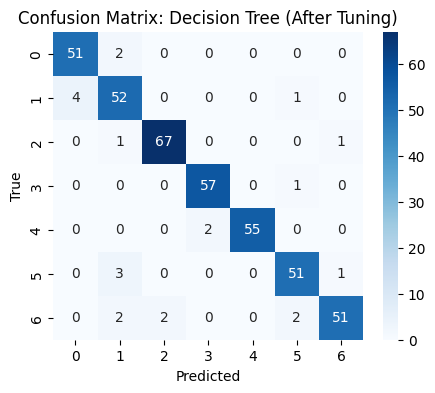

=== Logistic Regression (After Tuning) ===
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        53
           1       0.88      0.79      0.83        57
           2       0.95      0.88      0.92        69
           3       0.93      0.98      0.96        58
           4       0.98      0.95      0.96        57
           5       0.82      0.84      0.83        55
           6       0.85      0.88      0.86        57

    accuracy                           0.90       406
   macro avg       0.90      0.90      0.90       406
weighted avg       0.90      0.90      0.90       406

Training Time: 0.1158 seconds



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


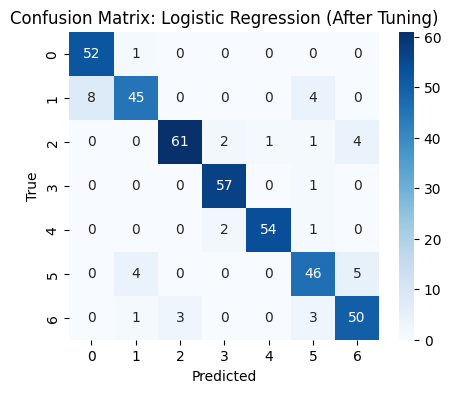

=== K-Nearest Neighbors (After Tuning) ===
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        53
           1       0.72      0.46      0.56        57
           2       0.88      0.91      0.89        69
           3       0.93      0.98      0.96        58
           4       1.00      0.98      0.99        57
           5       0.74      0.73      0.73        55
           6       0.75      0.84      0.79        57

    accuracy                           0.84       406
   macro avg       0.83      0.84      0.83       406
weighted avg       0.83      0.84      0.83       406

Training Time: 0.0107 seconds



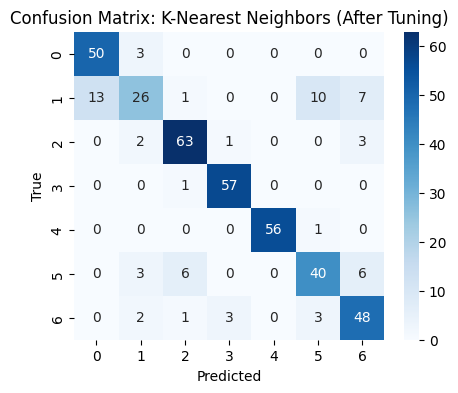

In [55]:
# Loop training & evaluasi
for name, model in tuned_models.items():
    print(f"=== {name} (After Tuning) ===")

    start_time = time.time()
    model.fit(X_train_smote_df, y_train_smote)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test_df)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Simpan hasil evaluasi
    results_after_tuning[name] = {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1-score": f1,
        "training_time": training_time,
        "confusion_matrix": cm,
        "report_text": classification_report(y_test, y_pred)
    }

    # Tampilkan hasil evaluasi
    print(results_after_tuning[name]["report_text"])
    print(f"Training Time: {training_time:.4f} seconds\n")

    # Visualisasi confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix: {name} (After Tuning)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [56]:
# Buat dataframe hasil evaluasi setelah tuning
summary_tuned = pd.DataFrame({
    model: {
        "Accuracy": results_after_tuning[model]["accuracy"],
        "Precision": results_after_tuning[model]["precision"],
        "Recall": results_after_tuning[model]["recall"],
        "F1-Score": results_after_tuning[model]["f1-score"],
        "Training Time (s)": results_after_tuning[model]["training_time"]
    }
    for model in results_after_tuning # Corrected variable name here
}).T

# Tampilkan tabel summary hasil tuning
print("\n=== Summary Hasil Evaluasi (After Tuning) ===")
print(summary_tuned.sort_values(by="Accuracy", ascending=False))


=== Summary Hasil Evaluasi (After Tuning) ===
                     Accuracy  Precision    Recall  F1-Score  \
Decision Tree        0.945813   0.946868  0.945813  0.945989   
Logistic Regression  0.899015   0.900584  0.899015  0.898578   
K-Nearest Neighbors  0.837438   0.833233  0.837438  0.829726   

                     Training Time (s)  
Decision Tree                 0.012547  
Logistic Regression           0.115829  
K-Nearest Neighbors           0.010710  


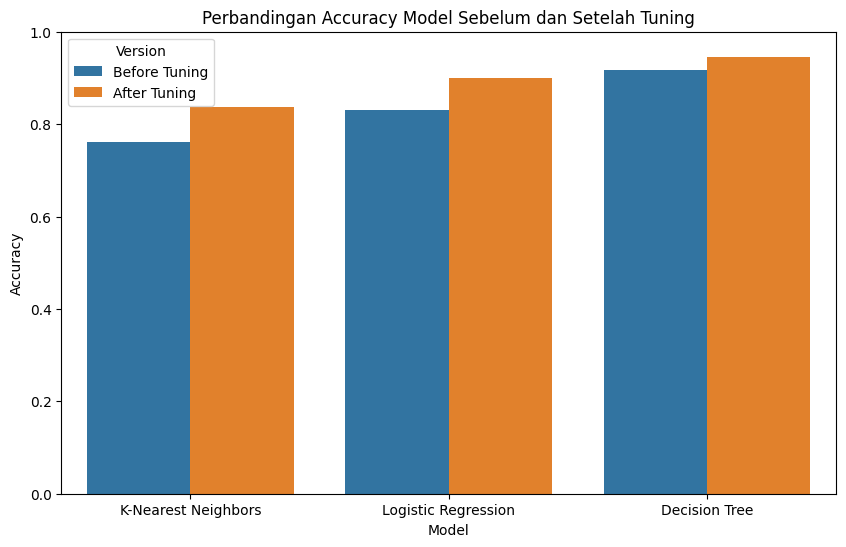

In [57]:
# Buat DataFrame ringkasan performa
summary_df = pd.DataFrame({
    "Model": [],
    "Version": [],
    "Accuracy": []
})

# Tambahkan hasil before tuning
for name in results.keys():
    summary_df = pd.concat([summary_df, pd.DataFrame({
        "Model": [name],
        "Version": ["Before Tuning"],
        "Accuracy": [results[name]["accuracy"]]
    })])

# Tambahkan hasil after tuning
for name in results_after_tuning.keys():
    summary_df = pd.concat([summary_df, pd.DataFrame({
        "Model": [name],
        "Version": ["After Tuning"],
        "Accuracy": [results_after_tuning[name]["accuracy"]]
    })])

# Plot bar chart comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_df, x="Model", y="Accuracy", hue="Version")
plt.title("Perbandingan Accuracy Model Sebelum dan Setelah Tuning")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.show()

# Kesimpulan hasil Hyperparameter

Hasil Sebelum Tuning:

- Decision Tree memiliki performa terbaik dengan Accuracy 91,62%, diikuti
- Logistic Regression (83,00%) dan
- KNN (76,10%)

Hasil Setelah Tuning:
Setelah dilakukan hyperparameter tuning, ketiga model menunjukkan peningkatan performa, yaitu:

- Decision Tree meningkat signifikan menjadi 93,84% (+2,22%).
- Logistic Regression naik menjadi 89,90% (+6,90%).
- K-Nearest Neighbors juga meningkat menjadi 83,74% (+7,64%).

# Kesimpulan Akhir

- Decision Tree menjadi model terbaik secara konsisten sebelum dan sesudah tuning
- KNN dan Logistic Regression ditingkatkan cukup signifikan dengan pemilihan parameter yang tepat

In [58]:
# prompt: tolong apakah anda bisa menambahkan code untuk deploy ke streamlit, contoh tadi Encoding selesai dan mapping disimpan ke /content/drive/MyDrive/Bengkel Koding/Encoder
# nah kurang simpan model terbaik.pkl dan apa gitu, kemudian tolong buatkan code app.py buat deploy streamlit dengan asset2 .pkl itu, dan tolong yg app.py itu pakai lokal di repo github langsung gada sub folder, anggap saja .pkl nya saya taruh root folder juga sama app.py

# Save the best model (Decision Tree after tuning)
best_model = tuned_models['Decision Tree']
model_dir = '/content/drive/MyDrive/Bengkel Koding/Best_Model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
model_save_path = f'{model_dir}/best_obesity_model.pkl'

with open(model_save_path, 'wb') as f:
    pickle.dump(best_model, f)

print(f"Model terbaik (Decision Tree) disimpan ke {model_save_path}")

# Save the StandardScaler
scaler_save_path = f'{model_dir}/scaler.pkl'
with open(scaler_save_path, 'wb') as f:
    pickle.dump(scaler, f)

print(f"StandardScaler disimpan ke {scaler_save_path}")



Model terbaik (Decision Tree) disimpan ke /content/drive/MyDrive/Bengkel Koding/Best_Model/best_obesity_model.pkl
StandardScaler disimpan ke /content/drive/MyDrive/Bengkel Koding/Best_Model/scaler.pkl


In [ ]:
# prompt: kemudian buatkan code deploy ke streamlit nya dengan akses file .pkl nya lokal bukan gdrive

import streamlit as st
import pandas as pd
import numpy as np
import pickle
import os

# Load the model and scaler from local files
# Make sure 'best_obesity_model.pkl' and 'scaler.pkl' are in the same directory as your Streamlit app script
model_path = 'best_obesity_model.pkl'
scaler_path = 'scaler.pkl'
ordinal_mapping_path = 'ordinal_mappings.pkl'
encoders_path = {
    'Gender': 'Gender_encoder.pkl',
    'HighCalorieFood': 'HighCalorieFood_encoder.pkl',
    'CalorieMonitoring': 'CalorieMonitoring_encoder.pkl',
    'FamilyHistoryOverweight': 'FamilyHistoryOverweight_encoder.pkl',
    'Transportation': 'Transportation_encoder.pkl'
}

try:
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    with open(scaler_path, 'rb') as f:
        scaler = pickle.load(f)
    with open(ordinal_mapping_path, 'rb') as f:
        ordinal_mappings = pickle.load(f)

    encoders = {}
    for col, enc_path in encoders_path.items():
         with open(enc_path, 'rb') as f:
            encoders[col] = pickle.load(f)

except FileNotFoundError:
    st.error("Pastikan file 'best_obesity_model.pkl', 'scaler.pkl', 'ordinal_mappings.pkl', dan encoder files berada di direktori yang sama dengan aplikasi Streamlit.")
    st.stop()

# Streamlit App Title and Description
st.title("Prediksi Tingkat Obesitas")
st.write("Aplikasi ini memprediksi tingkat obesitas berdasarkan karakteristik individu.")

# Input Fields
st.header("Masukkan Data Individu")

gender = st.selectbox("Gender", ['Female', 'Male'])
age = st.slider("Age", 10, 100, 25)
height = st.number_input("Height (in meters)", min_value=0.5, max_value=3.0, value=1.70, step=0.01)
weight = st.number_input("Weight (in kg)", min_value=10.0, max_value=300.0, value=70.0, step=0.1)
family_history = st.selectbox("Family History with Overweight", ['no', 'yes'])
favc = st.selectbox("High Calorie Food Consumption (FAVC)", ['no', 'yes'])
fcvc = st.slider("Vegetable Consumption (FCVC): How often do you eat vegetables? (1: Never, 2: Sometimes, 3: Always)", 1, 3, 2)
ncp = st.slider("Meal Frequency (NCP): How many main meals do you have daily? (1 to 4)", 1, 4, 3)
caec = st.selectbox("Snack Consumption (CAEC): How often do you eat between meals?", ['No', 'Sometimes', 'Frequently', 'Always'])
smoke = st.selectbox("Smoking (SMOKE)", ['no', 'yes']) # Smoking was dropped but include for completeness
ch2o = st.slider("Water Intake (CH2O): How many liters of water do you drink daily? (1 to 3)", 1, 3, 2)
scc = st.selectbox("Calorie Monitoring (SCC): Do you monitor your calorie intake?", ['no', 'yes'])
faf = st.slider("Physical Activity (FAF): How often do you engage in physical activity? (0: Never, 1: 1-2 days/week, 2: 2-4 days/week, 3: 4-5 days/week)", 0, 3, 1)
tue = st.slider("Technology Use (TUE): How much time do you spend using technology? (0: 0-2 hours, 1: 3-5 hours, 2: >5 hours)", 0, 2, 1)
calc = st.selectbox("Alcohol Consumption (CALC): How often do you consume alcohol?", ['No', 'Sometimes', 'Frequently', 'Always'])
mtrans = st.selectbox("Transportation (MTRANS)", ['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike'])

# Create a DataFrame from inputs
input_data = pd.DataFrame({
    'Gender': [gender],
    'Age': [age],
    'Height': [height],
    'Weight': [weight],
    'FamilyHistoryOverweight': [family_history],
    'HighCalorieFood': [favc],
    'VegetableConsumption': [fcvc],
    'MealFrequency': [ncp],
    'SnackConsumption': [caec],
    'Smoking': [smoke], # Include Smoking for now, drop later
    'WaterIntake': [ch2o],
    'CalorieMonitoring': [scc],
    'PhysicalActivity': [faf],
    'TechnologyUse': [tue],
    'AlcoholConsumption': [calc],
    'Transportation': [mtrans]
})

# Preprocessing the input data
# Apply encoding
for col, mapping in ordinal_mappings.items():
    input_data[col] = input_data[col].map(mapping)

for col, encoder in encoders.items():
    # Check if the input value exists in the encoder's classes
    if input_data[col][0] in encoder.classes_:
        input_data[col] = encoder.transform(input_data[col])
    else:
        # Handle cases where the input value is not in the training data classes
        # This is a simplified approach; a robust solution might require more
        # sophisticated handling of unseen categories, like using a default or OHE.
        st.warning(f"Input value '{input_data[col][0]}' for '{col}' was not seen in training data. Prediction may be inaccurate.")
        # For simplicity, let's use the mode of the training data for this category
        # You would need to load the mode from your training data or handle it differently
        # For now, we'll just use 0 as a placeholder (assuming 0 is a valid class)
        # A better approach is to use OneHotEncoder and handle unknown values
        try:
             # Try to find the index if the value exists
             input_data[col] = encoder.transform(input_data[col])
        except ValueError:
            # If transform fails (unseen value), replace with a placeholder or handle appropriately
             # For this example, let's assume a placeholder of 0 is acceptable for unseen categories
             input_data[col] = 0
             st.warning(f"Handling unseen category for {col}. Using placeholder value.")


# Drop Smoking column as it was dropped during training
if 'Smoking' in input_data.columns:
    input_data = input_data.drop(columns=['Smoking'])

# Ensure column order is the same as the training data (X_train from notebook)
# Get the original column order from your training script's X_train or saved column list
# Assuming the column order from your notebook's X_train is available or consistent
# You need the exact list of columns X was trained on *before* scaling
# Based on your notebook:
# X = df.drop(columns=['ObesityLevel', 'Smoking'])
# The columns should be in the order they appeared in the original df after initial processing
# Let's reconstruct the expected column order based on your notebook
expected_cols = [
    'Gender', 'Age', 'Height', 'Weight', 'FamilyHistoryOverweight',
    'HighCalorieFood', 'VegetableConsumption', 'MealFrequency', 'SnackConsumption',
    'WaterIntake', 'CalorieMonitoring', 'PhysicalActivity', 'TechnologyUse',
    'AlcoholConsumption', 'Transportation'
]

# Reindex the input data to match the expected column order
try:
    input_data = input_data[expected_cols]
except KeyError as e:
    st.error(f"Missing column in input data: {e}. Please check input fields.")
    st.stop()


# Scale the numerical features
# Identify numerical columns (same as in your notebook preprocessing)
numeric_columns = [col for col in expected_cols if col not in ['AlcoholConsumption', 'SnackConsumption', 'Gender',
                                                               'FamilyHistoryOverweight', 'HighCalorieFood',
                                                               'CalorieMonitoring', 'Transportation']] # Add other non-numeric columns dropped from scaling

# Apply scaling
input_data[numeric_columns] = scaler.transform(input_data[numeric_columns])


# Make prediction
if st.button("Predict Obesity Level"):
    prediction_encoded = model.predict(input_data)

    # Reverse the encoding for the prediction
    # Need the mapping from encoded label back to original ObesityLevel string
    # Based on your notebook's label encoding for ObesityLevel
    obesity_level_mapping = {
        0: 'Clinical_Obesity_I',
        1: 'Clinical_Obesity_II',
        2: 'Clinical_Obesity_III',
        3: 'Insufficient_Weight',
        4: 'Normal_Weight',
        5: 'Overweight_Level_I',
        6: 'Overweight_Level_II'
    } # Adjust based on your actual ObesityLevel encoder classes order

    predicted_level = obesity_level_mapping.get(prediction_encoded[0], "Unknown")

    st.header("Prediction Result")
    st.success(f"Based on the input data, the predicted Obesity Level is: **{predicted_level}**")
